<a href="https://colab.research.google.com/github/BairaviB/Playground/blob/main/Segement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

2021-05-25 18:42:52 URL:https://ucscgenomics.soe.ucsc.edu/wp-content/uploads/Screen-Shot-2019-09-03-at-11.27.12-AM.png [525584/525584] -> "bird.png" [1]


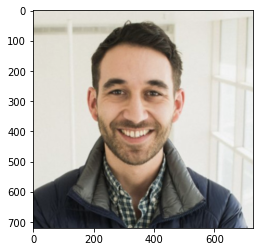

In [7]:
!wget -nv https://ucscgenomics.soe.ucsc.edu/wp-content/uploads/Screen-Shot-2019-09-03-at-11.27.12-AM.png -O bird.png

img = Image.open('./bird.png')
plt.imshow(img); 
plt.show()

In [8]:
img = Image.open("bird.png").convert('RGB')




In [9]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [10]:
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [11]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[ 0 15]


In [12]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

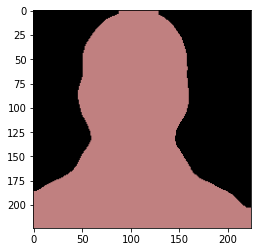

In [13]:
rgb = decode_segmap(om)
plt.imshow(rgb);
plt.show()

In [14]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


In [15]:
def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

In [18]:
!wget -nv https://image.shutterstock.com/image-photo/portrait-young-smiling-woman-260nw-330095525.jpg -O horse.png




2021-05-25 18:45:27 URL:https://image.shutterstock.com/image-photo/portrait-young-smiling-woman-260nw-330095525.jpg [20856/20856] -> "horse.png" [1]


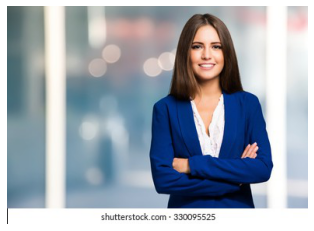

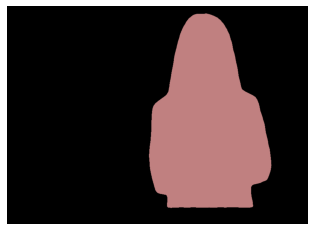

In [19]:

segment(fcn, './horse.png')


In [20]:
!wget -nv !wget -nv https://image.shutterstock.com/image-photo/portrait-young-smiling-woman-260nw-330095525.jpg -O horse.png -O horse.png

wget: unable to resolve host address ‘!wget’
2021-05-25 18:50:23 URL:https://image.shutterstock.com/image-photo/portrait-young-smiling-woman-260nw-330095525.jpg [20856/20856] -> "horse.png" [1]
FINISHED --2021-05-25 18:50:23--
Total wall clock time: 1.4s
Downloaded: 1 files, 20K in 0.2s (104 KB/s)


In [ ]:
path = 'D:\flower1.png'
segment(fcn, path)
